# PREDICTING FUTURE PRODUCT PRICES USING FACEBOOK PROPHET 



# IMPORT LIBRARIES AND DATASET

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns

!pip install fbprophet
from fbprophet import Prophet


In [2]:
#load data
avocado_df = pd.read_csv('avocado.csv')

#preview
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
#drop 'Unnamed: 0'
avocado_df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [4]:
#rename columns for consistency
avocado_df.columns = avocado_df.columns.str.lower()
avocado_df = avocado_df.rename(columns={'averageprice':'average price'})
avocado_df.head()

,date,average price,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#info
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           18249 non-null  object 
 1   average price  18249 non-null  float64
 2   total volume   18249 non-null  float64
 3   4046           18249 non-null  float64
 4   4225           18249 non-null  float64
 5   4770           18249 non-null  float64
 6   total bags     18249 non-null  float64
 7   small bags     18249 non-null  float64
 8   large bags     18249 non-null  float64
 9   xlarge bags    18249 non-null  float64
 10  type           18249 non-null  object 
 11  year           18249 non-null  int64  
 12  region         18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
#statistics
avocado_df.describe()

,average price,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
#check for duplicates
avocado_df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS

In [8]:
#sort by Date
avocado_df = avocado_df.sort_values('date')
avocado_df.head()

,date,average price,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


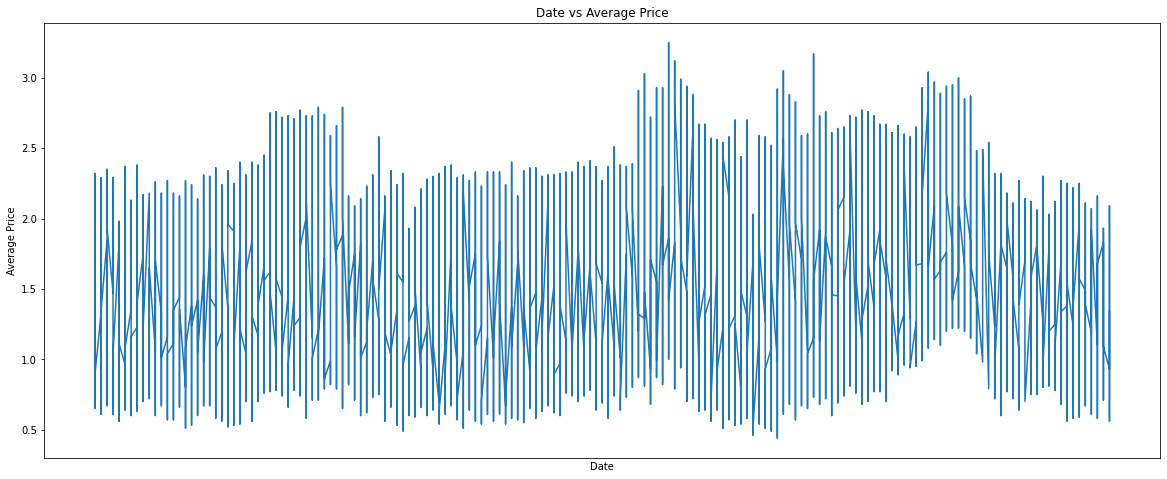

In [9]:
#date and average price
plt.figure(figsize=(20, 8))
plt.plot(avocado_df['date'],
         avocado_df['average price'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks([])
plt.title('Date vs Average Price');

<Figure size 720x432 with 0 Axes>

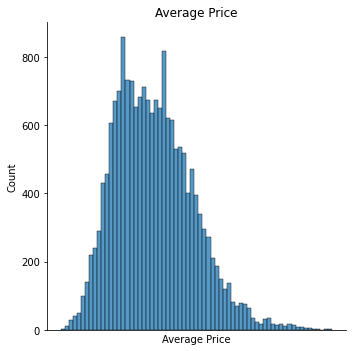

In [10]:
#distribution of the average price
plt.figure(figsize=(10, 6))
sns.displot(avocado_df['average price'])
plt.xlabel('Average Price')
plt.xticks([])
plt.title('Average Price');

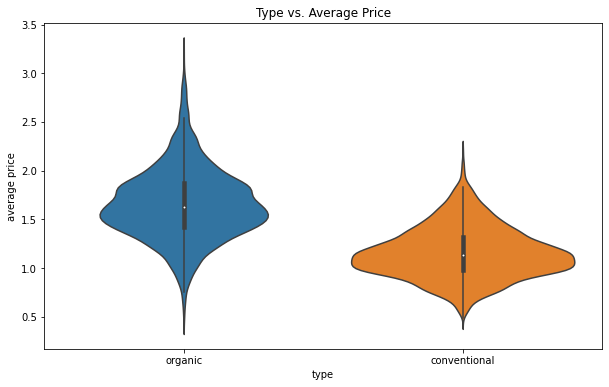

In [11]:
#average price vs. avocado type
plt.figure(figsize=(10, 6))
sns.violinplot(x='type',
               y='average price',
               data=avocado_df)
plt.title('Type vs. Average Price');

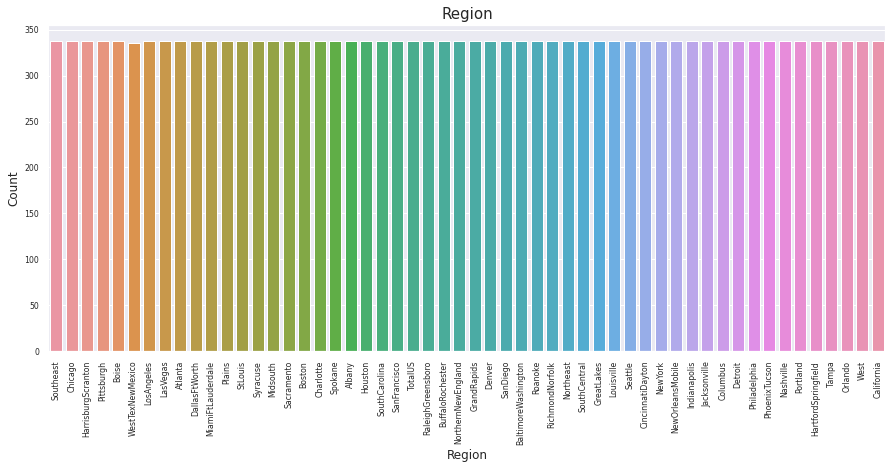

In [12]:
#number of regions 
sns.set(font_scale=0.7) 
plt.figure(figsize=(15, 6))
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 90)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Region', fontsize=15);


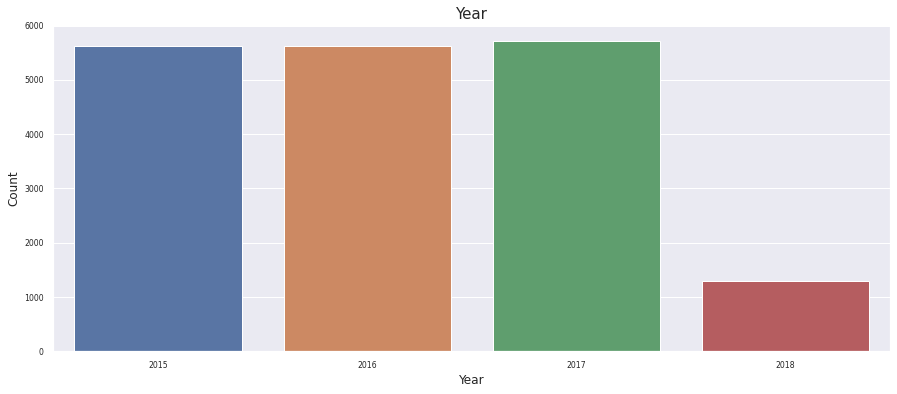

In [13]:
#count in every year
sns.set(font_scale=0.7) 
plt.figure(figsize=(15, 6))
sns.countplot(x = 'year', data = avocado_df)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Year', fontsize=15);

<Figure size 2160x1440 with 0 Axes>

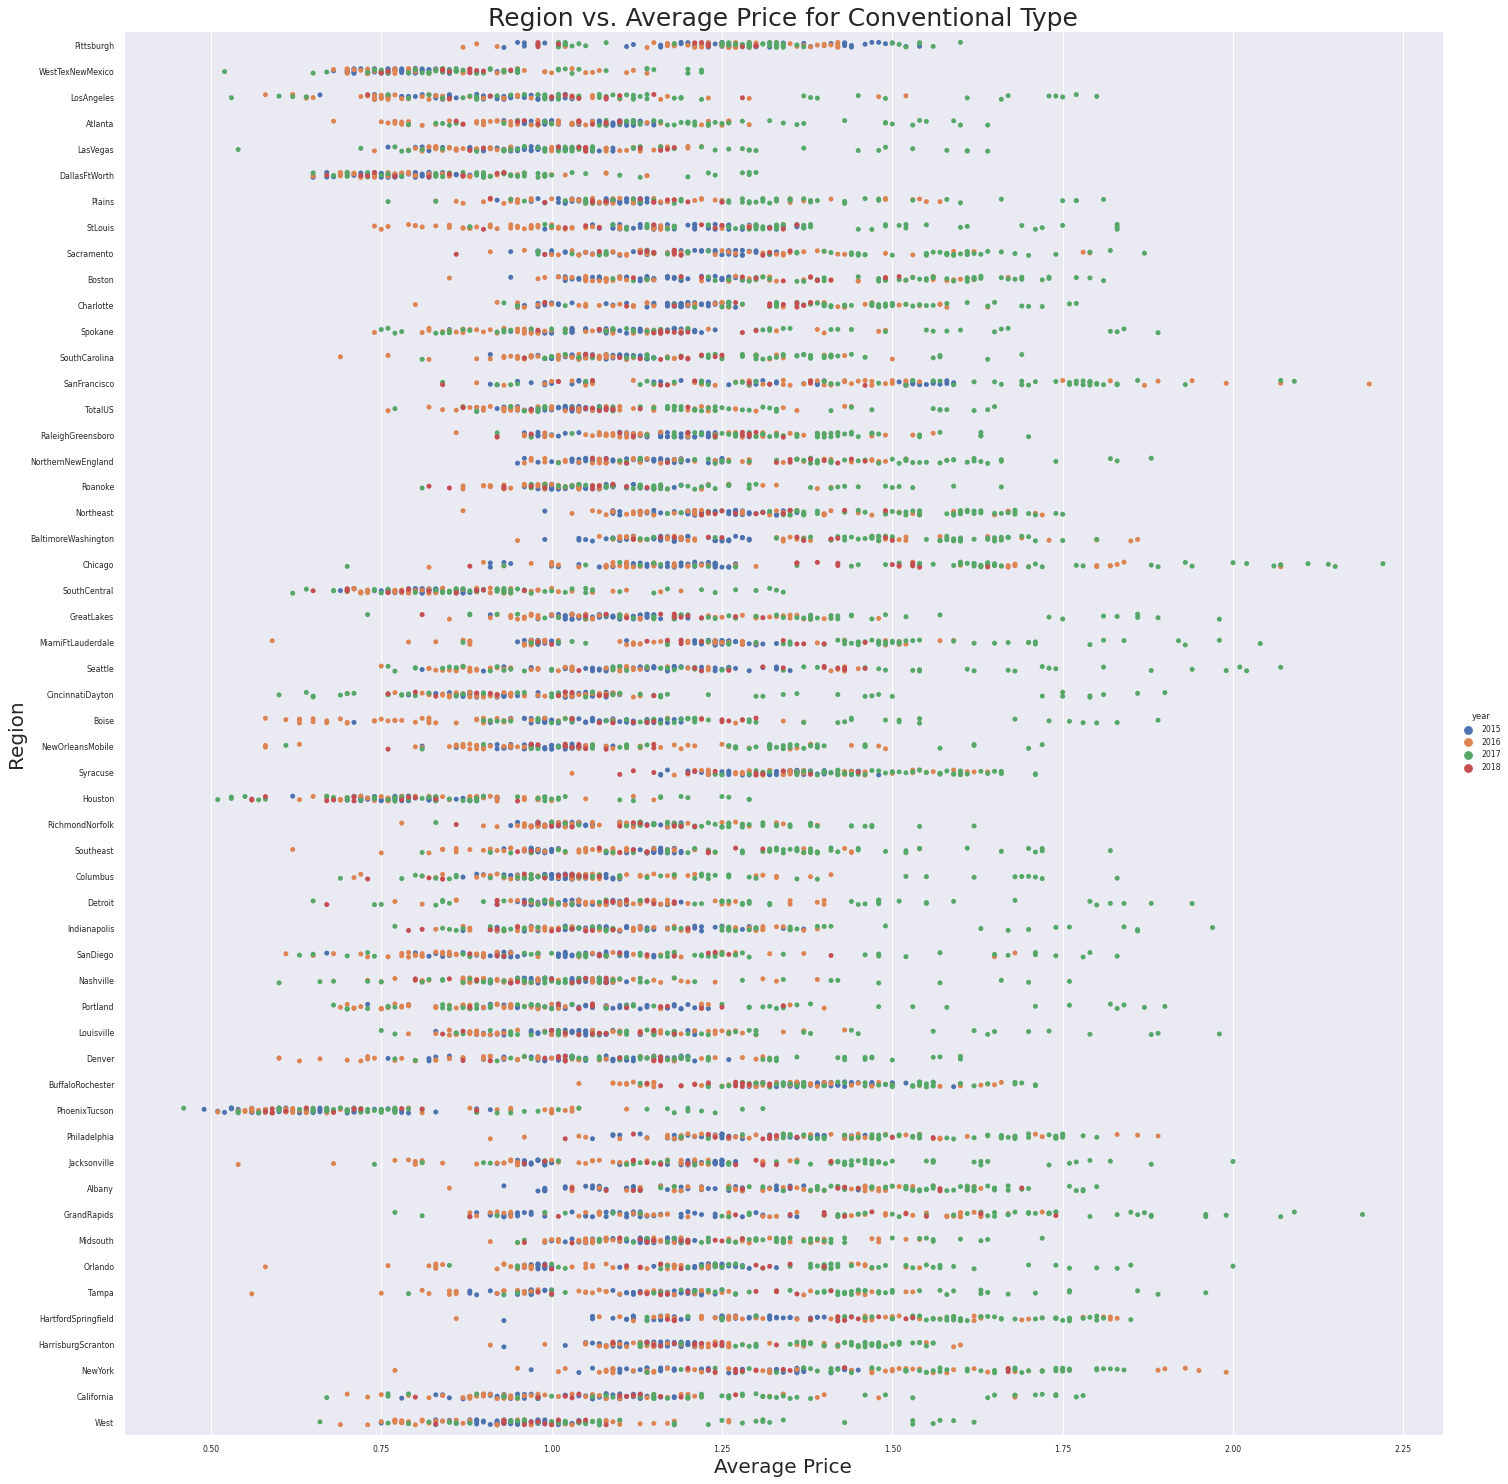

In [14]:
#avocado prices vs. regions for conventional avocados
plt.figure(figsize=(30, 20))
sns.catplot(x='average price',
            y='region',
            data=avocado_df[avocado_df['type']=='conventional'],
            hue='year',
            height=20)
plt.xlabel('Average Price', fontsize=20)
plt.ylabel('Region', fontsize=20)
plt.title('Region vs. Average Price for Conventional Type', fontsize=25);

<Figure size 2160x1440 with 0 Axes>

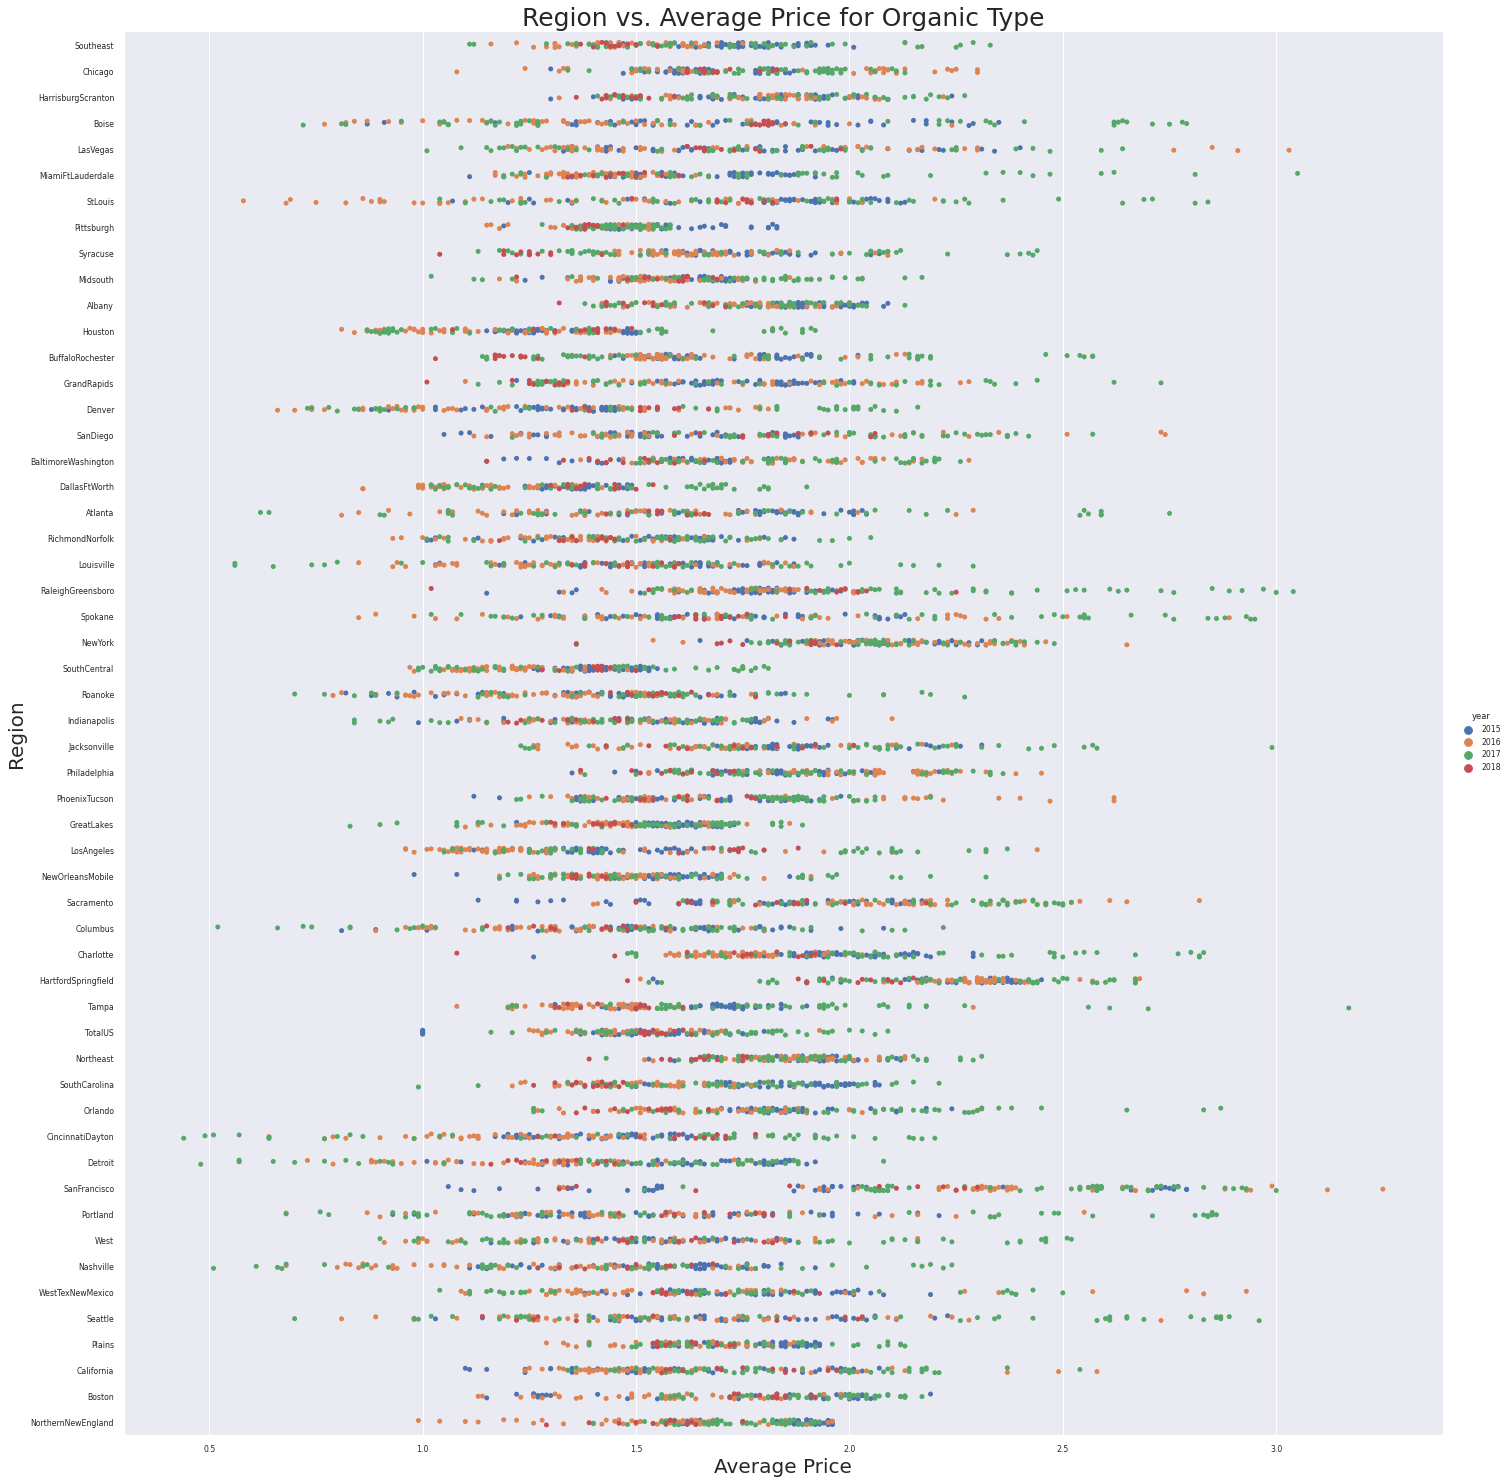

In [15]:
#avocado prices vs. regions for organic avocados
plt.figure(figsize=(30, 20))
sns.catplot(x='average price',
            y='region',
            data=avocado_df[avocado_df['type']=='organic'],
            hue='year',
            height=20)
plt.xlabel('Average Price', fontsize=20)
plt.ylabel('Region', fontsize=20)
plt.title('Region vs. Average Price for Organic Type', fontsize=25);

# DATA PREPROCESSING

In [16]:
#only need dates and average price in correct format ds and y
avocado_prophet_df = avocado_df[['date', 'average price']]
avocado_prophet_df.head()

,date,average price
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [17]:
#rename columns
avocado_prophet_df = avocado_prophet_df.rename(columns={'date':'ds', 'average price':'y'})
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


# DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [18]:
#initialize
model = Prophet()

#fit
model.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [19]:
#forcasting into the future
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

#preview
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498818,0.925617,1.853210,1.498818,1.498818,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,-0.113604,0.0,0.0,0.0,1.385214
1,2015-01-11,1.493637,0.900609,1.850836,1.493637,1.493637,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,-0.105192,0.0,0.0,0.0,1.388445
2,2015-01-18,1.488455,0.895584,1.814563,1.488455,1.488455,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,-0.104862,0.0,0.0,0.0,1.383592
3,2015-01-25,1.483273,0.891705,1.842850,1.483273,1.483273,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,-0.123788,0.0,0.0,0.0,1.359485
4,2015-02-01,1.478091,0.896399,1.834685,1.478091,1.478091,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,-0.152113,0.0,0.0,0.0,1.325978


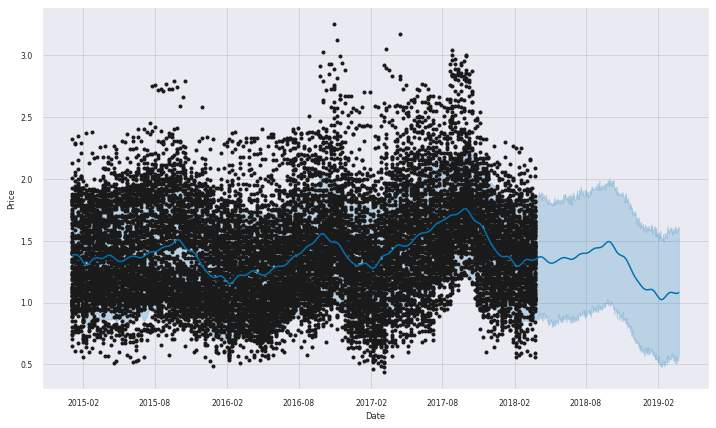

In [20]:
#visualize forecast
figure = model.plot(forecast,
                    xlabel='Date',
                    ylabel='Price')

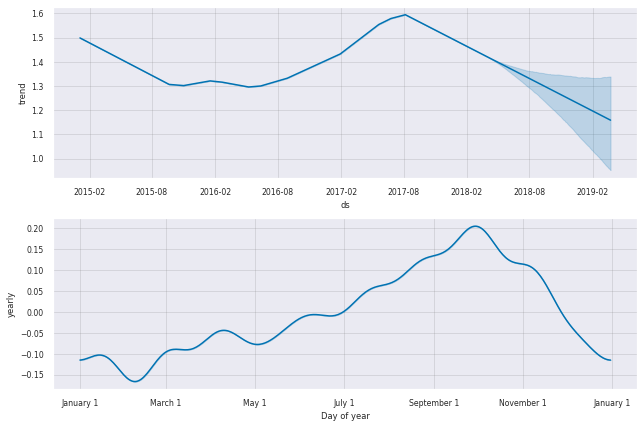

In [21]:
#visualize
figure = model.plot_components(forecast)

# DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [22]:
#select specific region
avocado_region_df = avocado_df[avocado_df['region']=='California']
avocado_region_df.head()

,date,average price,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
9489,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California
363,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
9488,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California
362,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California
9487,2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.00,0.00,organic,2015,California


In [23]:
#sort by date
avocado_region_df = avocado_region_df.sort_values('date')
avocado_region_df.head()

,date,average price,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
9489,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California
363,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
9488,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California
362,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California
9487,2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.00,0.00,organic,2015,California


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


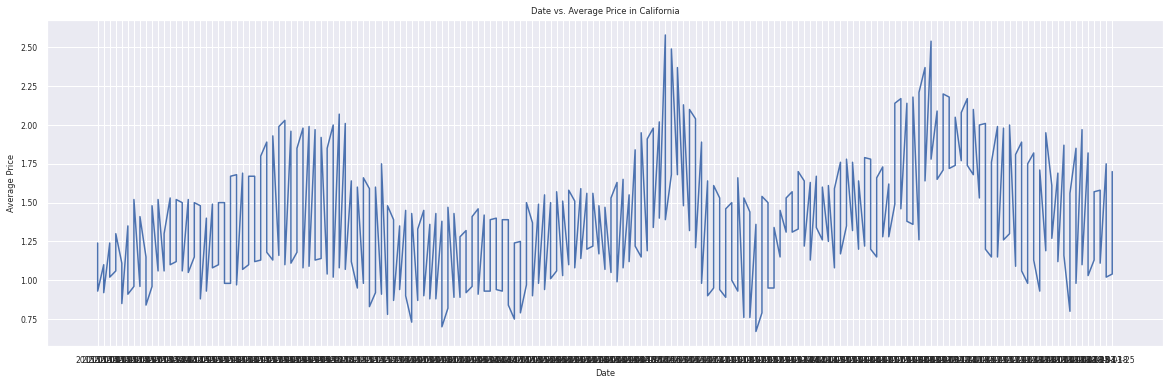

In [24]:
#date vs average price
plt.figure(figsize=(20, 6))
plt.plot(avocado_region_df['date'],
         avocado_region_df['average price'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Date vs. Average Price in California');

In [25]:
#rename to correct format
avocado_region_df = avocado_region_df.rename(columns={'date':'ds', 'average price':'y'})
avocado_region_df.head()

,ds,y,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
9489,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California
363,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California
9488,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California
362,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California
9487,2015-01-18,1.24,195207.60,123138.29,58616.16,0.00,13453.15,13453.15,0.00,0.00,organic,2015,California


In [26]:
#create model
model = Prophet()
model.fit(avocado_region_df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


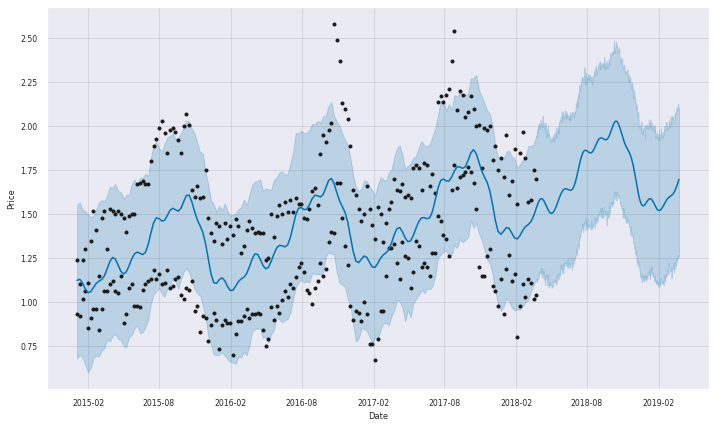

In [27]:
#visualize
figure = model.plot(forecast, xlabel='Date', ylabel='Price')

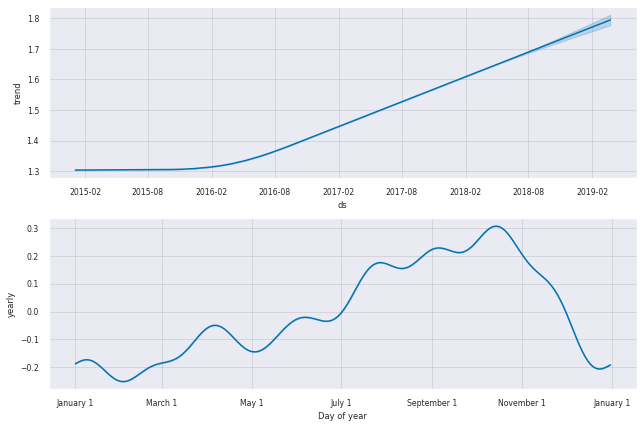

In [28]:
#visualize
figure = model.plot_components(forecast)